In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
np.random.seed(42)
n_samples = 100

In [38]:
# Dữ liệu môi trường
temperature = np.round(np.random.normal(25, 5, n_samples), 1)  # 20-30°C
humidity = np.round(np.random.normal(60, 10, n_samples), 1)    # 50-70%
air_quality = np.round(np.random.uniform(0.68, 3.62, n_samples), 1)  # 0.68-3.62


# feeding_times phụ thuộc cả môi trường và button_presses
feeding_times = (
    3
    - 0.1 * (temperature - 25)   # trời nóng hơn thì giảm ăn
    + 0.05 * (humidity - 60)     # ẩm hơn thì tăng ăn
    - 0.4 * air_quality          # không khí kém thì ăn ít
    + np.random.normal(0, 0.5, n_samples)  # nhiễu
)
feeding_times = np.clip(np.round(feeding_times), 1, 7).astype(int)  # giới hạn 1-7 lần/ngày

In [39]:
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Air_Quality': air_quality,
    'Feeding_Times': feeding_times
})

# Lưu dataset vào file CSV
data.to_csv('game_data.csv', index=False)

In [40]:
# X = data[['Temperature', 'Humidity', 'Feeding_Times', 'Air_Quality']]
# y = data['Button_Presses']
X = data[['Temperature', 'Humidity', 'Air_Quality']]
y = data['Feeding_Times']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print("Hệ số hồi quy:", model.coef_)
print("Hệ số chặn:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Hệ số hồi quy: [-0.09728127  0.05444143 -0.36289194]
Hệ số chặn: 2.175930005510035
Mean Squared Error: 0.106785683841167
R^2 Score: 0.8182371338873753


In [44]:
def predict_feeding_times(temperature, humidity, air_quality):
    input_data = np.array([[temperature, humidity, air_quality]])
    prediction = model.predict(input_data)
    return prediction[0]

In [46]:
example = predict_feeding_times(25, 70, 1.0)
print(f"Dự đoán số lần nên cho ăn: {int(example)}")

Dự đoán số lần nên cho ăn: 3


/Users/tawannt/Study/University/SecondYear/ThirdTerm/Physics/IoT-Project/temp/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
import joblib

In [48]:
joblib.dump(model, 'model.joblib') #save the model

['model.joblib']

In [49]:
loaded_model = joblib.load('model.joblib')
example_loaded = loaded_model.predict([[25, 60, 1.7]])
print(f"Dự đoán từ mô hình tải lại (với Air_Quality = 1.7): {int(np.round(example_loaded[0]))}")

Dự đoán từ mô hình tải lại (với Air_Quality = 1.7): 2


/Users/tawannt/Study/University/SecondYear/ThirdTerm/Physics/IoT-Project/temp/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
import matplotlib.pyplot as plt

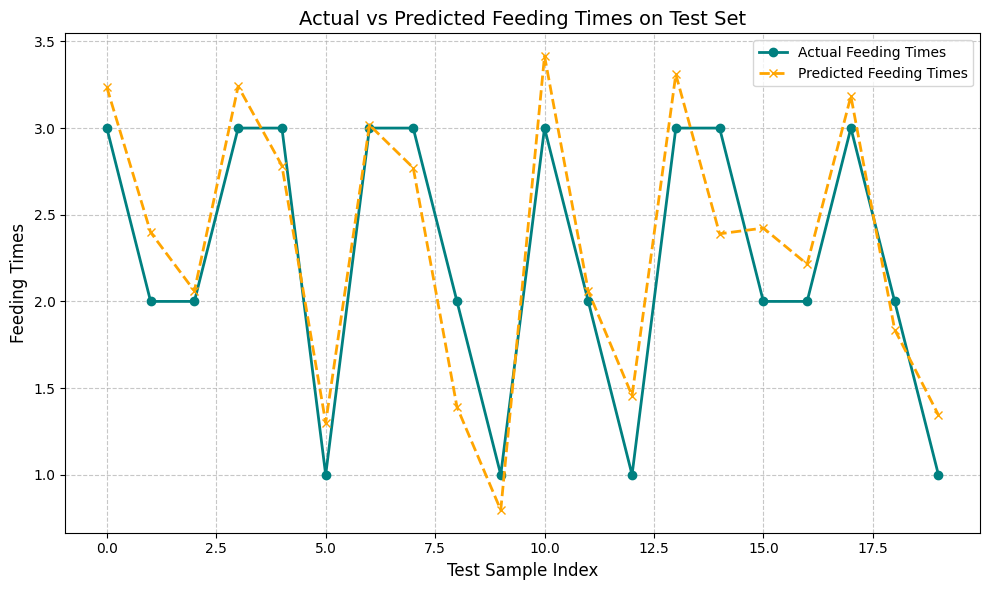

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='teal', label='Actual Feeding Times', linestyle='-', linewidth=2)
plt.plot(range(len(y_test)), y_pred, marker='x', color='orange', label='Predicted Feeding Times', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Feeding Times on Test Set', fontsize=14)
plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Feeding Times', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
